# The Sparks Foundation, Singapore : Data Science & Business Analytics Internship 

**Raghvendra Pratap Singh**

**Task 1:** Prediction using Supervised ML

**Data Source:** http://bit.ly/w-data

**Problem statement:** What will be the predicted score if student studies for 9.25 hours/day.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("4 Task 1 Supervised ML - data.xlsx")

In [23]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.shape

(25, 2)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

reference: https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

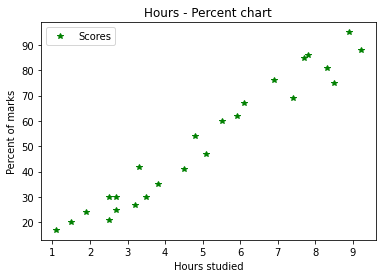

In [21]:
#plotting Hours vs. Percentage

df.plot(x = 'Hours',y = 'Scores', style = 'g*')
plt.title('Hours - Percent chart')
plt.xlabel('Hours studied')
plt.ylabel('Percent of marks')
plt.show()

In [33]:
x1 = df.iloc[:,0].values
y1 = df.iloc[:,1].values

x = x1.reshape(-1,1)
y = y1.reshape(-1,1)

Since dataset is small, we don't create a development set and divide the dataset into 80:20 split

In [34]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

**Linear Regression**

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
RegressionLine = model.coef_ * x + model.intercept_

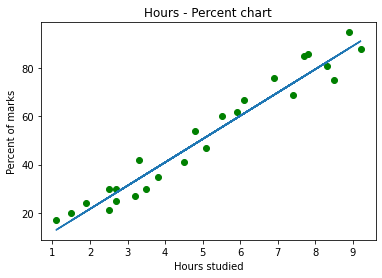

In [52]:
plt.title('Hours - Percent chart')
plt.xlabel('Hours studied')
plt.ylabel('Percent of marks')
plt.scatter(x,y, c = 'g')
plt.plot(x, RegressionLine)
plt.show()

**Predictions**

In [58]:
predictedVal = model.predict(x_test)

In [59]:
predictedVal

array([[76.75745986],
       [91.27738849],
       [20.61373585],
       [26.4217073 ],
       [88.37340276]])

**Evaluations**

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [66]:
print("Mean Absolute Error:", mean_absolute_error(y_test, predictedVal))

Mean Absolute Error: 5.022216540835546


In [67]:
print("R2 score:", r2_score(y_test, predictedVal))

R2 score: 0.9689716264602072


**Test**

In [68]:
hoursOfStudy = np.array(9.25)
hoursOfStudy = hoursOfStudy.reshape(-1, 1)
predictedValue = model.predict(hoursOfStudy)
print("If the student studies for 9.25 hours, he is expected to score {}.".format(predictedValue))

If the student studies for 9.25 hours, he is expected to score [[91.76138611]].


**We can safely say that student can achieve 91.76% of marks if he/she studies for 9.25 hours**